In [2]:
import tensorflow as tf

!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-05-25 22:56:05--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 172.64.145.29, 104.18.42.227, 2606:4700:4400::6812:2ae3, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|172.64.145.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   163MB/s    in 0.4s    

2024-05-25 22:56:06 (163 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
import zipfile,os

local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [4]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      horizontal_flip=True,
      shear_range=0.2,
      fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
      rescale=1./255
)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

validation_generator= test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
              )

In [15]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 18s - loss: 0.8911 - accuracy: 0.4900 - val_loss: 0.6940 - val_accuracy: 0.5000 - 18s/epoch - 738ms/step
Epoch 2/20
25/25 - 14s - loss: 0.6705 - accuracy: 0.5600 - val_loss: 1.0554 - val_accuracy: 0.5000 - 14s/epoch - 579ms/step
Epoch 3/20
25/25 - 15s - loss: 0.7039 - accuracy: 0.5100 - val_loss: 0.6918 - val_accuracy: 0.5000 - 15s/epoch - 614ms/step
Epoch 4/20
25/25 - 15s - loss: 0.7085 - accuracy: 0.5400 - val_loss: 0.7081 - val_accuracy: 0.5000 - 15s/epoch - 590ms/step
Epoch 5/20
25/25 - 14s - loss: 0.7062 - accuracy: 0.4400 - val_loss: 0.6854 - val_accuracy: 0.5000 - 14s/epoch - 576ms/step
Epoch 6/20
25/25 - 14s - loss: 0.6638 - accuracy: 0.5800 - val_loss: 0.6164 - val_accuracy: 0.6000 - 14s/epoch - 575ms/step
Epoch 7/20
25/25 - 14s - loss: 0.6744 - accuracy: 0.6700 - val_loss: 0.6619 - val_accuracy: 0.5500 - 14s/epoch - 572ms/step
Epoch 8/20
25/25 - 14s - loss: 0.6432 - accuracy: 0.6700 - val_loss: 0.6138 - val_accuracy: 0.8000 - 14s/epoch - 571ms/step
Epoch 9/

Saving e5cf44956cfa8f43fd3fe68f099f44d2b5c3914d.webp to e5cf44956cfa8f43fd3fe68f099f44d2b5c3914d.webp
1/1 [==============================] - 0s 39ms/step
e5cf44956cfa8f43fd3fe68f099f44d2b5c3914d.webp
messy


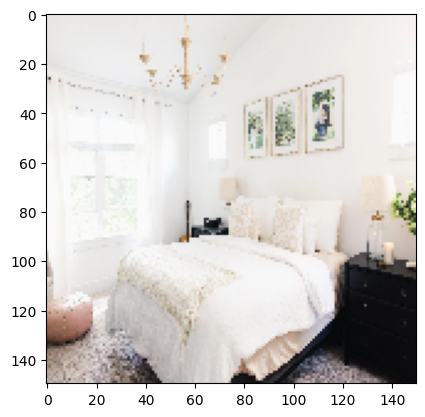

In [19]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('clean')
  else:
   print('messy')